# Task 3

# Imports

In [1]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.rcParams.update(
    {"font.size": 16, "axes.labelweight": "bold", "figure.figsize": (8, 6)}
)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-oj_is30w because the default path (/home/jupyter-student92/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

**1. Read the data CSV**

In [2]:
## You could download it from your bucket, or you can use the file that I have in my bucket.
## You should be able to access it from my bucket using your key and secret
# aws_credentials = {
#     "key": "",
#     "secret": "",
# } # removed secret and key when submitting the notebook
df = pd.read_csv(
    "s3://mds-s3-student96/ml_data_SYD.csv",
    index_col=0,
    parse_dates=True,
    storage_options=aws_credentials,
)

**2. Drop rows with nans**

In [3]:
df = df.dropna()

**3. Split the data**

In [4]:
train, test = train_test_split(df, test_size=0.2, random_state=123)

**4. Carry out EDA on the train split**

In [5]:
train.head()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
time,,,,,,,,,,,,,,,,,,,,,
1953-10-26,17.906051,0.837579,9.753198e-14,0.018863,2.878923e-01,0.007043,0.122719,10.855838,0.022752,0.472927,...,6.688447e+00,2.860546,9.779330e-14,2.980863e-01,1.659176e-13,3.841924e+00,2.713473,0.659440,0.129196,1.833044
1921-10-22,0.515505,1.911354,1.135404e+00,0.000002,4.091981e-01,0.009669,0.074208,1.239226,3.566098,0.667190,...,2.368273e-01,0.652848,1.132699e-13,7.653117e-08,4.560164e-03,4.178978e-02,7.909935,0.206765,2.018346,4.038183
1925-01-22,0.161412,2.666091,7.012887e-02,2.040689,1.338349e+01,0.073243,0.000255,1.349633,0.075959,0.059223,...,1.082573e-01,2.977031,1.320287e-13,1.937005e-04,1.692996e-13,1.290949e-03,0.183711,1.733777,0.932259,0.419818
1902-11-21,3.651607,3.117433,1.142701e-13,0.000016,4.658142e-09,3.913076,9.442968,0.720382,5.314680,0.122738,...,1.635075e-01,0.021314,9.901551e-01,1.142382e+00,1.840662e-03,4.955181e-02,0.000068,12.988330,0.005468,0.698486
1925-02-17,0.635625,39.042773,1.084678e+00,31.690315,6.208601e-09,0.416932,0.733783,0.004239,0.439862,0.404930,...,4.388535e-13,0.025447,2.918170e+00,1.314147e-01,3.690330e-01,2.357034e-08,0.036247,0.298767,2.923645,0.000000


In [6]:
train.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
count,36791.000000,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,...,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,3.679100e+04,3.679100e+04,36791.000000
mean,2.429419,2.938955,3.716329e+00,2.203086e+00,2.748441e+00,3.092784,3.575203e+00,3.489756e+00,2.879339,2.565430e+00,...,3.213535e+00,1.299377e+00,2.041242e+00,1.533212e+00,1.726792e+00,2.458268,2.890478,3.383557e+00,3.417809e+00,2.726320
std,6.791374,7.048794,7.280859e+00,6.518224e+00,5.997439e+00,6.459254,7.353451e+00,7.039201e+00,6.898890,5.732742e+00,...,6.979341e+00,4.890737e+00,5.347782e+00,5.000287e+00,4.872754e+00,5.815333,7.129072,7.927354e+00,7.558577e+00,8.078310
min,0.000000,0.000000,9.161142e-14,4.211430e-24,1.091904e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.155419e-14,9.479186e-33,1.435053e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.054108,0.021248,2.961787e-02,5.089918e-04,2.381995e-03,0.138315,8.899328e-02,9.271159e-02,0.022493,1.201630e-02,...,1.169275e-04,1.270013e-13,1.358104e-13,5.380599e-05,1.866808e-13,0.005478,0.010013,3.651962e-02,4.934874e-02,0.008084
50%,0.192980,0.492758,5.923147e-01,9.644146e-02,2.986511e-01,0.633548,8.278889e-01,8.486242e-01,0.337613,4.296779e-01,...,2.081838e-01,1.579151e-03,1.140358e-01,3.185565e-02,4.989652e-02,0.169617,0.255937,6.539921e-01,6.675421e-01,0.163215
75%,1.445456,2.398539,3.601697e+00,1.318940e+00,2.477893e+00,3.182630,3.727703e+00,3.629963e+00,2.558854,2.295852e+00,...,2.699071e+00,3.465456e-01,1.192421e+00,6.732646e-01,7.874740e-01,1.822582,2.450690,3.275132e+00,3.234430e+00,1.612815
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,124.952390,1.401478e+02,1.375916e+02,135.569753,9.642382e+01,...,9.306766e+01,1.095008e+02,7.484368e+01,1.016900e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.673562e+02,192.933030


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36791 entries, 1953-10-26 to 1932-01-31
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCESS-CM2        36791 non-null  float64
 1   ACCESS-ESM1-5     36791 non-null  float64
 2   AWI-ESM-1-1-LR    36791 non-null  float64
 3   BCC-CSM2-MR       36791 non-null  float64
 4   BCC-ESM1          36791 non-null  float64
 5   CMCC-CM2-HR4      36791 non-null  float64
 6   CMCC-CM2-SR5      36791 non-null  float64
 7   CMCC-ESM2         36791 non-null  float64
 8   CanESM5           36791 non-null  float64
 9   EC-Earth3-Veg-LR  36791 non-null  float64
 10  FGOALS-g3         36791 non-null  float64
 11  GFDL-CM4          36791 non-null  float64
 12  INM-CM4-8         36791 non-null  float64
 13  INM-CM5-0         36791 non-null  float64
 14  KIOST-ESM         36791 non-null  float64
 15  MIROC6            36791 non-null  float64
 16  MPI-ESM-1-2-HAM   36791

In [8]:
train.iloc[:10, :2]

,ACCESS-CM2,ACCESS-ESM1-5
time,,
1953-10-26,17.906051,0.837579
1921-10-22,0.515505,1.911354
1925-01-22,0.161412,2.666091
1902-11-21,3.651607,3.117433
1925-02-17,0.635625,39.042773
1894-06-12,0.002297,0.000000
2000-05-24,5.095856,9.987622
1954-03-18,1.739935,0.639129
1995-03-20,0.079807,17.272380


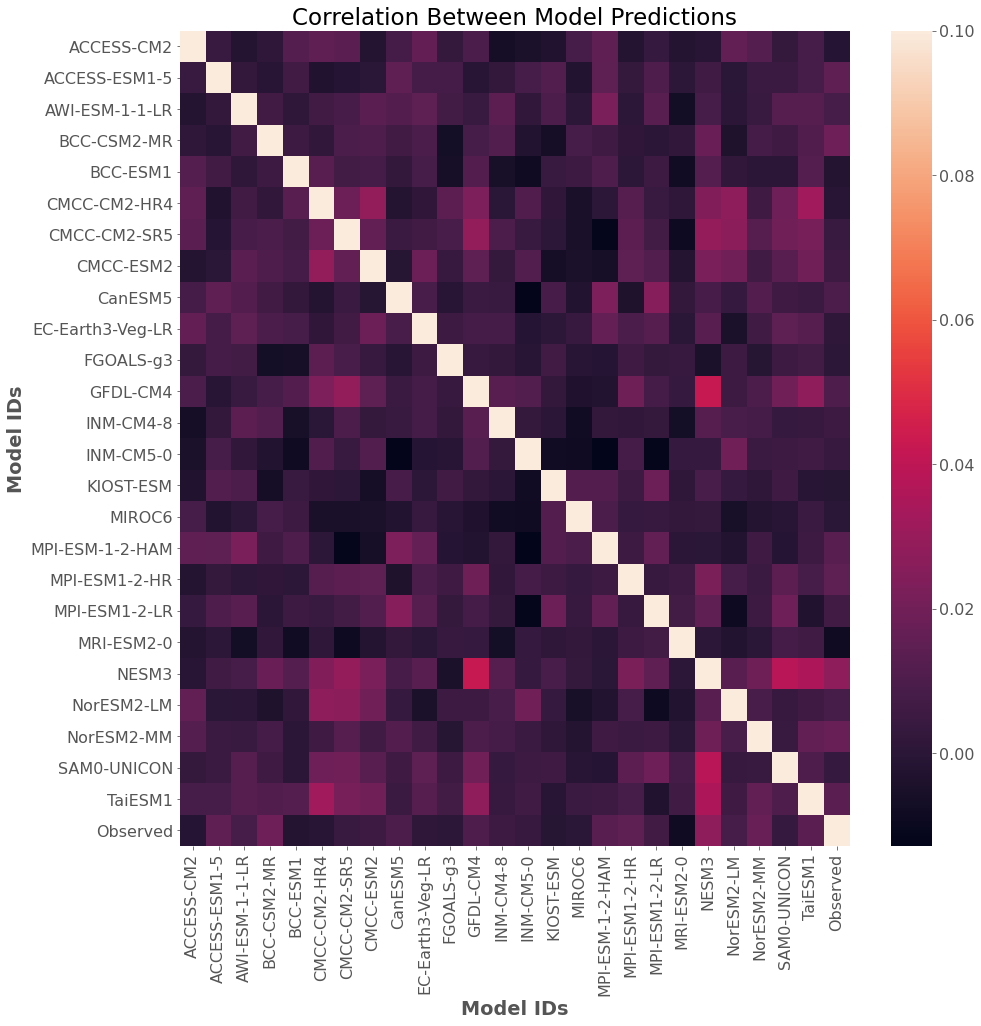

In [9]:
correlations = train.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlations, vmax=0.1)
plt.title("Correlation Between Model Predictions")
plt.xlabel("Model IDs")
plt.ylabel("Model IDs");

**5. Train ensumble machine learning model and evaluate with RMSE**

In [10]:
X_train, y_train = train.drop(columns=["Observed"]), train["Observed"]
X_test, y_test = test.drop(columns=["Observed"]), test["Observed"]

In [11]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
print(
    f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}"
)
print(
    f"Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}"
)

Train RMSE: 3.11
Test RMSE: 8.85


In [13]:
models = {}
for column in X_train:
    models[column] = mean_squared_error(y_train, X_train[column], squared=False)

model_rmse = pd.DataFrame(models.items(), columns=["Model", "RMSE"])
model_rmse.set_index("Model")

,RMSE
Model,
ACCESS-CM2,10.567243
ACCESS-ESM1-5,10.643536
AWI-ESM-1-1-LR,10.876956
BCC-CSM2-MR,10.294775
BCC-ESM1,10.071200
CMCC-CM2-HR4,10.353439
CMCC-CM2-SR5,10.935517
CMCC-ESM2,10.713240
CanESM5,10.571301


**6. Discuss results**

> - The `RandomForestRegressor` ensemble model with default arguments gets a decent RMSE score of 3.13 on the train dataset. Compare this with each individual climate models we find that no individual model gets an RMSE less than 9. Therefore, we can say that our ensemble model with default arguments has better results than the individual climate models.
> - However, by companring the train RMSE with test RMSE of the `RandomForestRegressor` ensemble model, we can see that the `RandomForestRegressor` model with default hyperparameters is clearly overfitting the training dataset. In this case, we need to tune hyperparameters next in Task 4.

## Part 2:

### Preparation for deploying model next week

#### Complete task 4 from the milestone3 before coming here

We’ve found ```n_estimators=100, max_depth=5``` to be the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [14]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [15]:
print(
    f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}"
)
print(
    f"Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}"
)

Train RMSE: 7.90
Test RMSE: 8.66


In [16]:
# ready to deploy
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3. You choose how you want to upload it.***

**Screenshot from S3 bucket**
![task3](https://raw.githubusercontent.com/UBC-MDS/525_group16/main/notebooks/milestone3/Screenshots/task3_milestone3.png)